In [3]:
#Manipulação de dados

#importando biblioteca Pandas
import pandas as pd

#Leitura dos arquivos
df = pd.read_excel("produtos.xlsx")

#importando biblioteca para análise exploratória
import matplotlib.pyplot as plt
#definindo estilo
plt.style.use("seaborn")
df.head()


,NomeCat,IDProduto,CodProd,NomeProd,Peso,Estoque,Disponivel,Preco,Lancamento,EmDestaque,IDsFiltroItem
0,Abraçadeira,6217460,170627.0,"Abraçadeira rosca sem fim AE 913, 3/8"" a 1/2"",...",9,1,True,1.43,False,True,154994.0
1,Acessórios,6219164,370780.0,Adaptador SDS Plus p/ Mandril de 1/2 P HTOM 17257,5,1,True,0.00,False,True,154998.0
2,Acessórios,6216370,453674.0,Aplicador de Detergente - Karcher 93020540,175,1,True,0.00,False,True,154984.0
3,Acessórios,6216466,453691.0,Bico Turbo Simples 04 P/HD585 HD5/12 HD6/15 H...,553,1,True,0.00,False,True,154984.0
4,Acessórios,6139985,453901.0,Bocal com Cerdas para Limpadoras a Vapor - Ka...,178,2,True,0.00,False,True,154984.0


In [4]:
#Verificando o tipo de dado de cada coluna
df.dtypes

NomeCat           object
IDProduto          int64
CodProd          float64
NomeProd          object
Peso               int64
Estoque            int64
Disponivel          bool
Preco            float64
Lancamento          bool
EmDestaque          bool
IDsFiltroItem    float64
dtype: object

In [5]:
df.sample(5)

,NomeCat,IDProduto,CodProd,NomeProd,Peso,Estoque,Disponivel,Preco,Lancamento,EmDestaque,IDsFiltroItem
169,Furadeira e Parafusadeira,6263798,452894.0,NaN,0,1,True,31688.0,False,False,NaN
368,Serra Circular,6265305,455036.0,NaN,0,1,True,63387.0,True,False,NaN
36,Acessórios,6214691,453195.0,Jogo de pontas e chaves soquete - 43 peças Bos...,66,10,True,11891.0,False,True,154981.0
135,Disco Flap,6207555,455080.0,"Disco Flap 115mm x 22,23mm Grão 120 Bosch 2608...",84,20,True,0.0,False,True,154981.0
178,Jogos de Chaves,6218762,454783.0,Jogo Chave Combinada 8 Peças 8 a 19mm Em Aço -...,8,1,True,0.0,False,True,154983.0


In [7]:
df["NomeCat"].value_counts(ascending=False)

Acessórios                   52
Lavadoras de Alta Pressão    44
Jogos de Chaves              17
Alicates                     17
Aspiradores                  14
Lav. e Sec. de Pisos         13
Martelete Perfurador         13
Furadeira e Parafusadeira    12
Serra Tico-Tico              11
Serra Mármore                11
Macaco Hidráulico            11
Esmerilhadeira               10
Carregador de Bateria         9
Politriz                      8
Cinta Amarração Catraca       8
Eletrodos                     8
Disco Flap                    8
Lixadeira                     8
Máquina Solda Mig             7
Pistola para Pintura          7
Retifica                      7
Limpadora Extratora           6
Serra Circular                6
Soprador                      6
Plaina                        6
Martelete Demolidor           6
Bico de Corte                 5
Ferramentas Bateria           5
Retificador/Inversor          5
Cortador de Metal             5
Kits                          4
Disco de

<AxesSubplot:>

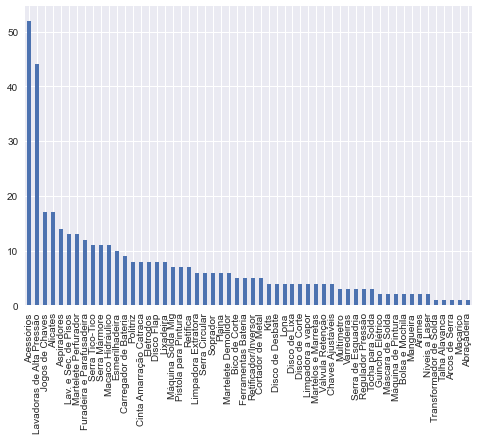

In [8]:
#Gráfico de barras
df["NomeCat"].value_counts(ascending=False).plot.bar()

#Gráfico de barras horizontais
#df["NomeCat"].value_counts().plot.barh()

<AxesSubplot:ylabel='Estoque'>

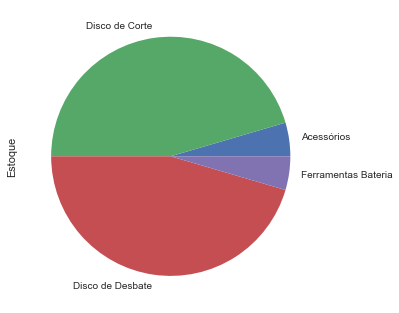

In [26]:
#Gráfico de Pizza
dfEstoque = df.sort_values("Estoque", ascending=False).head(10)
dfEstoque.groupby('NomeCat')['Estoque'].sum().plot.pie()

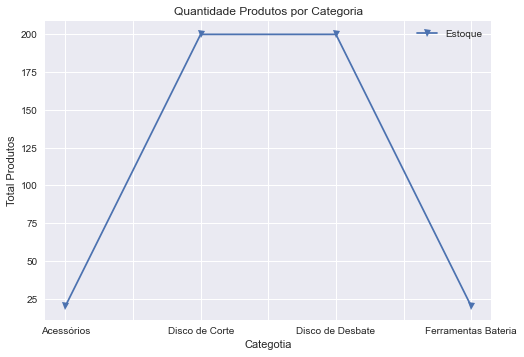

In [27]:
#Salvando em png
dfEstoque.groupby(dfEstoque["NomeCat"])["Estoque"].sum().plot(marker = "v")
plt.title("Quantidade Produtos por Categoria")
plt.xlabel("Categotia")
plt.ylabel("Total Produtos");
plt.legend()
plt.savefig("grafico Produto_Categoria.png")

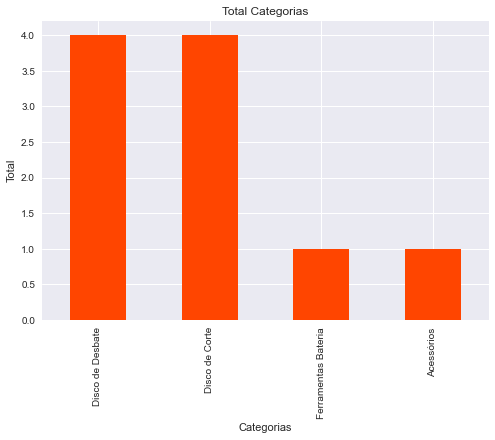

In [13]:
#Adicionando um título e alterando o nome dos eixos e cor
dfEstoque["NomeCat"].value_counts().plot.bar(title="Total Categorias",color="orangered")
plt.xlabel("Categorias")
plt.ylabel("Total");

In [21]:
#Selecionando apenas Lixaderas
df_Bateria = df[df["NomeCat"] == "Lixadeira"]
df_Bateria.tail()

,NomeCat,IDProduto,CodProd,NomeProd,Peso,Estoque,Disponivel,Preco,Lancamento,EmDestaque,IDsFiltroItem
268,Lixadeira,6263800,348711.0,NaN,0,1,True,50973.0,False,False,NaN
269,Lixadeira,6263801,347450.0,NaN,0,1,True,50973.0,False,False,NaN
270,Lixadeira,6214708,NaN,Lixadeira Excêntrica GEX 125-1 AE Profissional...,2105,10,True,50973.0,False,True,154981.0
271,Lixadeira,6214717,NaN,Lixadeira Orbital de Palma 200W 114mm 7232 SKIL,119,5,True,25624.0,False,True,154981.0
272,Lixadeira,6252045,NaN,Lixadeira Vibratória GSS 140 STD Bosch,138,1,True,28389.0,True,False,154981.0


In [19]:
df_Bateria.groupby(df_Bateria["NomeCat"])["Estoque"].sum()

NomeCat
Lixadeira    21
Name: Estoque, dtype: int64